Epoch 1/60


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6181 - loss: 0.7686 - val_accuracy: 0.7805 - val_loss: 0.5598
Epoch 2/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7736 - loss: 0.4493 - val_accuracy: 0.7988 - val_loss: 0.5175
Epoch 3/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8581 - loss: 0.3385 - val_accuracy: 0.7988 - val_loss: 0.4947
Epoch 4/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8901 - loss: 0.2781 - val_accuracy: 0.8171 - val_loss: 0.4668
Epoch 5/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8626 - loss: 0.3026 - val_accuracy: 0.8354 - val_loss: 0.4351
Epoch 6/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8948 - loss: 0.2992 - val_accuracy: 0.8232 - val_loss: 0.4155
Epoch 7/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8998 - loss: 0.2660 - val_accuracy: 0.8415 - val_loss: 0.3924
Epoch 8/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8896 - loss: 0.2802 - val_accuracy: 0.8354 - val_loss: 0.3682
Ep

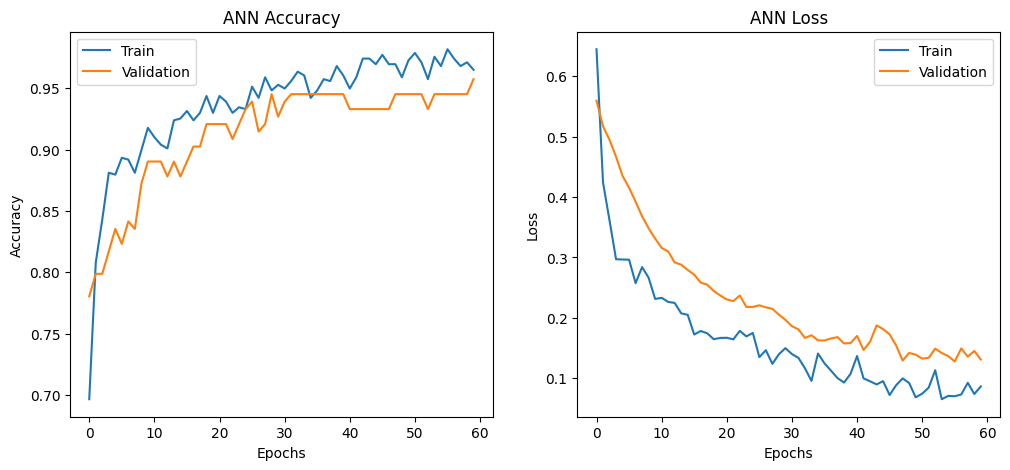

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# LOAD DATA
df = pd.read_csv("/content/heart.csv")

target_column = "target"  
X = df.drop(target_column, axis=1)
y = df[target_column]


# TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# SCALING
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ANN MODEL (Deeper)
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # for binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# TRAINING
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=60,
    batch_size=32
)


# EVALUATE
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


# PLOT ACCURACY & LOSS
plt.figure(figsize=(12,5))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ANN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()
